# Курсовой проект
# Барковская Ольга

In [1]:
# Загрузка бибилиотек

import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Чтение данных из файла в формате csv

df = pd.read_csv('BankChurners.csv')

In [3]:
# Просмотр данных

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
# Приведение наименований столбцов в единый формат

df = df.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))

In [5]:
# Удаление ненужных столбцов
df.drop(['naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2','naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1'],axis=1,inplace=True)

In [7]:
# Просмотр информации о наборе данных, индекс, столбцы и тип данных, ненулевые значения и использование памяти

# DataFrame содержит 21 столбец и 10127 строк
# DataFrame не содержит пустых значений (null)
# Типы данных:
#      int64    - Целые числа
#      float64  - Числа с плавающей точкой
#      object   - Текстовые или смешанные числовые и нечисловые значения


df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [8]:
# Просмотр количества уникальных значений в столбцах
# Количество уникальных клиентов равно количеству строк, т.е. все клиенты встречаются один раз

df.nunique()

clientnum                   10127
attrition_flag                  2
customer_age                   45
gender                          2
dependent_count                 6
education_level                 7
marital_status                  4
income_category                 6
card_category                   4
months_on_book                 44
total_relationship_count        6
months_inactive_12_mon          7
contacts_count_12_mon           7
credit_limit                 6205
total_revolving_bal          1974
avg_open_to_buy              6813
total_amt_chng_q4_q1         1158
total_trans_amt              5033
total_trans_ct                126
total_ct_chng_q4_q1           830
avg_utilization_ratio         964
dtype: int64

In [9]:
# Просмотр уникальных значений по отдельным столбцам

# Attrited Customer - счет закрыт
# Existing Customer - счет открыт

df.attrition_flag.unique ()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [10]:
# Половая принадлежность
# M=мужчина, F=женщина

df.gender.unique ()

array(['M', 'F'], dtype=object)

In [11]:
# Демографическая переменная — количество иждивенцев
# Диапазон значений от 0 до 5

df.dependent_count.unique ()

array([3, 5, 4, 2, 0, 1], dtype=int64)

In [12]:
# Уровень образования 

df.education_level.unique ()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [13]:
# Семейное положение

df.marital_status.unique ()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [14]:
# Годовой доход владельца счета с разбивкой на диапазоны

df.income_category.unique ()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [15]:
# Тип банковской карты

df.card_category.unique ()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [16]:
# Общее количество продукции, хранящейся у клиента (от 1 до 5)

df.total_relationship_count.unique ()

array([5, 6, 4, 3, 2, 1], dtype=int64)

In [17]:
# Доля мужчин и женщин в датасете

df.gender.value_counts (normalize=True)

F    0.529081
M    0.470919
Name: gender, dtype: float64

In [18]:
df.attrition_flag.value_counts (normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: attrition_flag, dtype: float64

In [19]:
df.dependent_count.value_counts (normalize=True)

3    0.269774
2    0.262170
1    0.181495
4    0.155426
0    0.089266
5    0.041868
Name: dependent_count, dtype: float64

In [20]:
df.education_level.value_counts (normalize=True)

Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: education_level, dtype: float64

In [21]:
df.income_category.value_counts (normalize=True)

Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: income_category, dtype: float64

In [22]:
# Создание Датафрейма, содержащего только attrited_customer
df_attrited_customer = df.query("attrition_flag == 'Attrited Customer'")

In [23]:
df_attrited_customer.head (3)

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562


In [24]:
# Создание Датафрейма, содержащего только attrited_customer existing_customer
df_existing_customer = df.query("attrition_flag == 'Existing Customer'")

In [25]:
df_existing_customer.head (3)

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [26]:
# Просмотр описательной статистики по attrited_customer
df_attrited_customer  [['credit_limit', 'total_revolving_bal', 'avg_open_to_buy','total_amt_chng_q4_q1',\
                        'total_trans_amt', 'total_trans_ct','total_ct_chng_q4_q1', 'avg_utilization_ratio']]\
.describe ()

,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [27]:
# Просмотр описательной статистики по existing_customer
df_existing_customer [['credit_limit', 'total_revolving_bal', 'avg_open_to_buy','total_amt_chng_q4_q1',\
                       'total_trans_amt', 'total_trans_ct','total_ct_chng_q4_q1', 'avg_utilization_ratio']]\
.describe ()

,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568
min,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


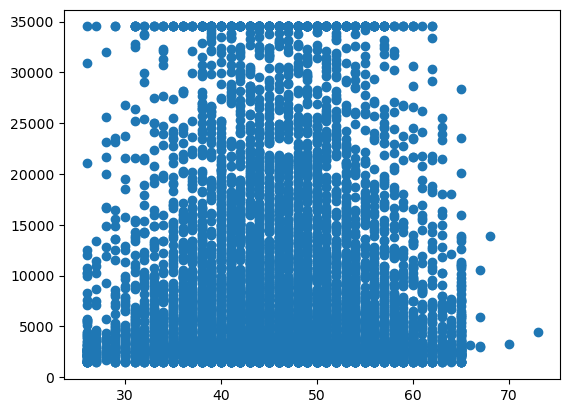

In [28]:
# График customer_age VS credit_limit для existing_customer

plt.scatter(df_existing_customer.customer_age, df_existing_customer.credit_limit)

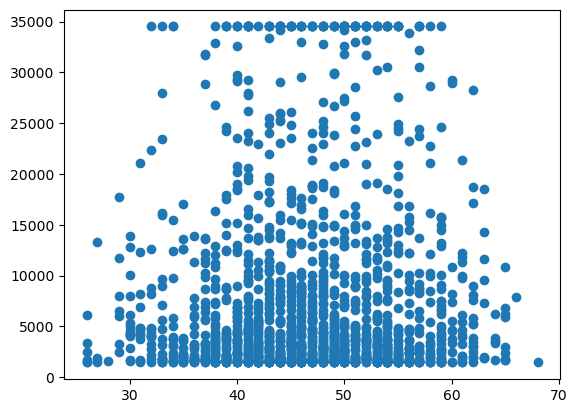

In [29]:
# График customer_age VS credit_limit для attrited_customer

plt.scatter(df_attrited_customer.customer_age, df_attrited_customer.credit_limit)

In [30]:
# Сводная таблица, содержащая среднее значение credit_limit в разрезе attrition_flag и gender

df_credit_limit = pd.pivot_table(df, index="attrition_flag", columns = "gender", values = "credit_limit", aggfunc="mean")

In [31]:
df_credit_limit

gender,F,M
attrition_flag,,
Attrited Customer,4515.497527,12966.891679
Existing Customer,5130.622967,12637.539391


In [32]:
# Сводная таблица, содержащая среднее значение customer_age в разрезе attrition_flag и gender

df_customer_age = pd.pivot_table(df, index="attrition_flag", columns = "gender", values = "customer_age", aggfunc="mean")

In [33]:
df_customer_age

gender,F,M
attrition_flag,,
Attrited Customer,46.623656,46.707317
Existing Customer,46.421861,46.088409


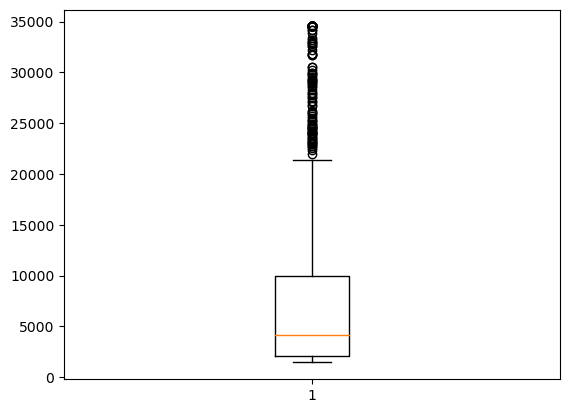

In [34]:
# коробчатая диаграмма, показывающий, что для 50% attrited_customer
# credit_limit не превышал 10000 и редко превышал 20000

plt.boxplot(df_attrited_customer.credit_limit)
plt.show()

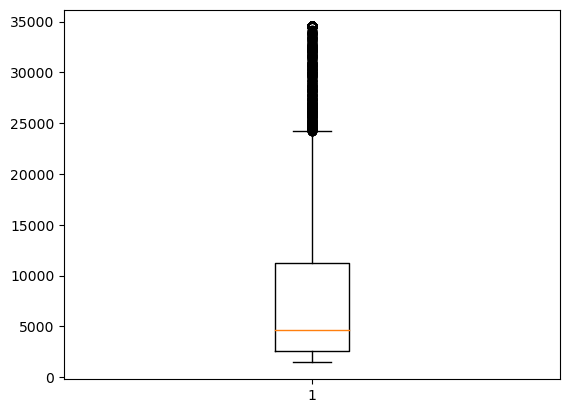

In [35]:
# коробчатая диаграмма, показывающий, что для 50% df_existing_customer
# credit_limit не превышал 11000 и редко превышал 24000

plt.boxplot(df_existing_customer.credit_limit)
plt.show()

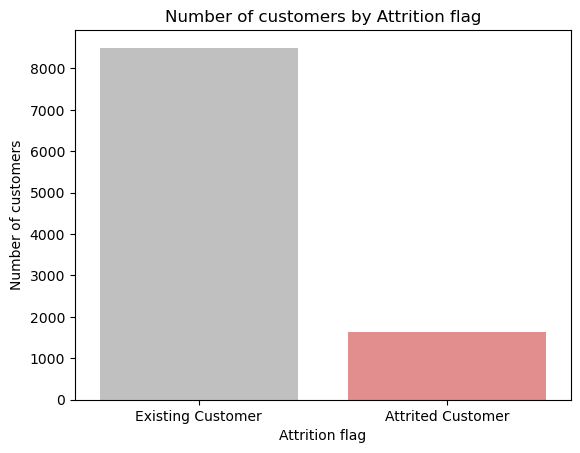

In [35]:
# График
color = ['#C0C0C0', '#F08080']
sns.set_palette(sns.color_palette(color))
sns.countplot(x="attrition_flag", data=df)
plt.title("Number of customers by Attrition flag")
plt.ylabel("Number of customers")
plt.xlabel("Attrition flag")
plt.show()

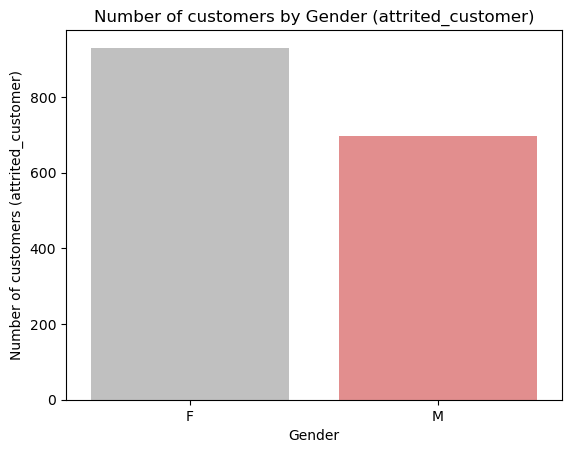

In [38]:
color = ['#C0C0C0', '#F08080']
sns.set_palette(sns.color_palette(color))
sns.countplot(x="gender", data=df_attrited_customer)
plt.title("Number of customers by Gender (attrited_customer)")
plt.ylabel("Number of customers (attrited_customer)")
plt.xlabel("Gender")
plt.show()

C:\Users\New\AppData\Local\Temp\ipykernel_5540\1748066350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_attrited_customer.corr()


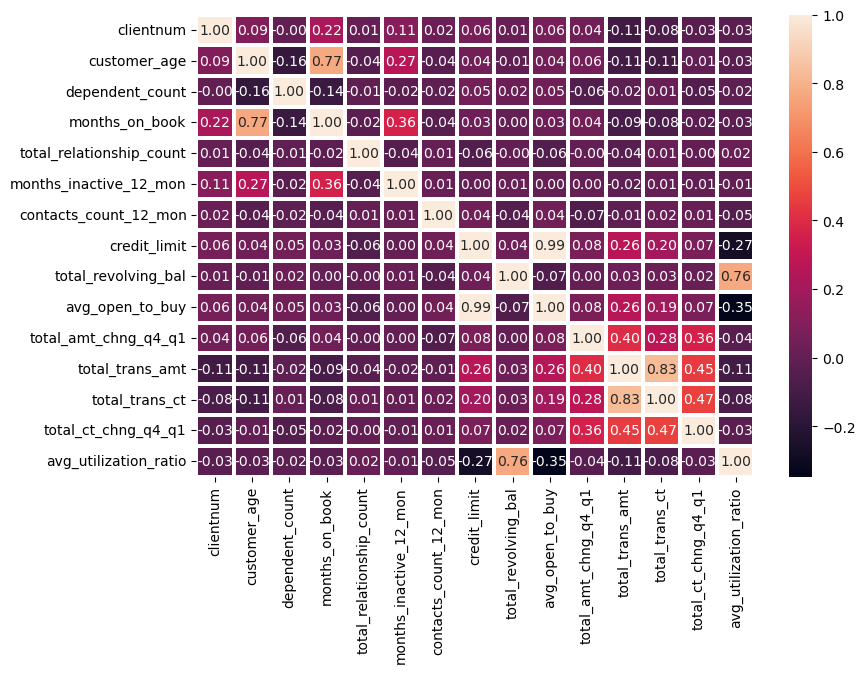

In [41]:
# Корреляционная матрица для attrited_customer
corr = df_attrited_customer.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

C:\Users\New\AppData\Local\Temp\ipykernel_5540\504918416.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_existing_customer.corr()


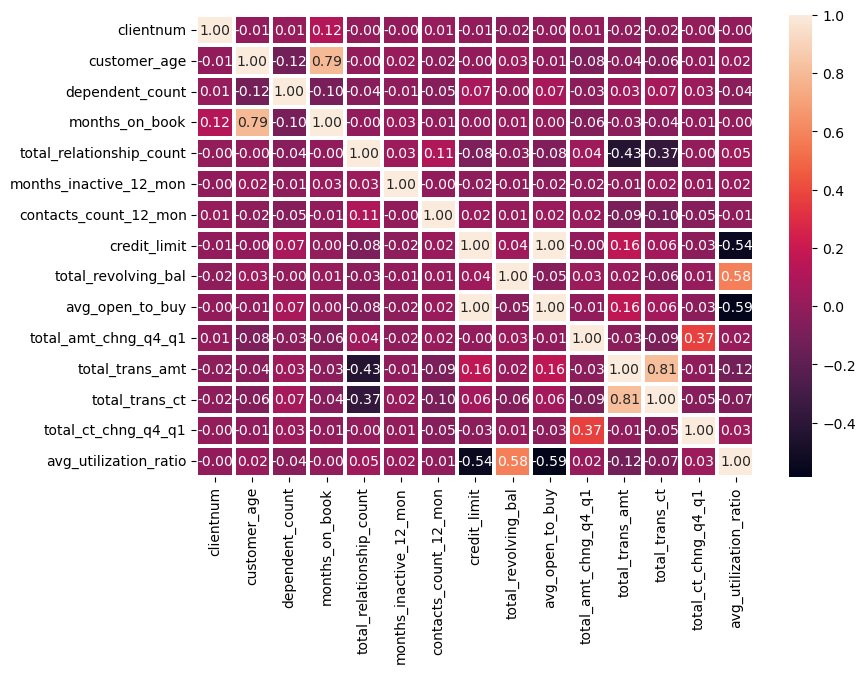

In [42]:
# Корреляционная матрица для existing_customer

corr = df_existing_customer.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Высокий коэффициент корреляции

0,81 - Total_Trans_Amt/Total_Trans_Ct

0,79 - Months_on_book/Customer_Age

Для attrited_customer
0,76 - Avg_Utilization_Ratio/Total_Revolving_Bal

# Процентное соотношение переменных

In [90]:
df_gender = (df.groupby(['attrition_flag'])['gender']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)
df_gender

,attrition_flag,gender,perc
0,Attrited Customer,F,0.57
1,Attrited Customer,M,0.43
2,Existing Customer,F,0.52
3,Existing Customer,M,0.48


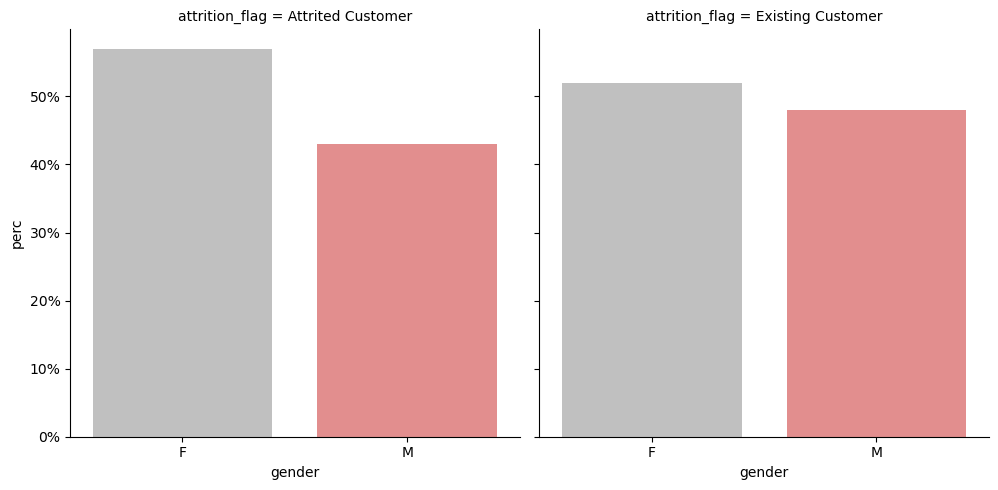

In [91]:
from  matplotlib.ticker import PercentFormatter
gender = sns.catplot(x = 'gender', y='perc', col = 'attrition_flag', kind = 'bar', data = df_gender)
for ax in gender.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

In [92]:
df_dependent_count = (df.groupby(['attrition_flag'])['dependent_count']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)
df_dependent_count

,attrition_flag,dependent_count,perc
0,Attrited Customer,3,0.30
1,Attrited Customer,2,0.26
2,Attrited Customer,1,0.17
3,Attrited Customer,4,0.16
4,Attrited Customer,0,0.08
5,Attrited Customer,5,0.04
6,Existing Customer,3,0.26
7,Existing Customer,2,0.26
8,Existing Customer,1,0.18
9,Existing Customer,4,0.15


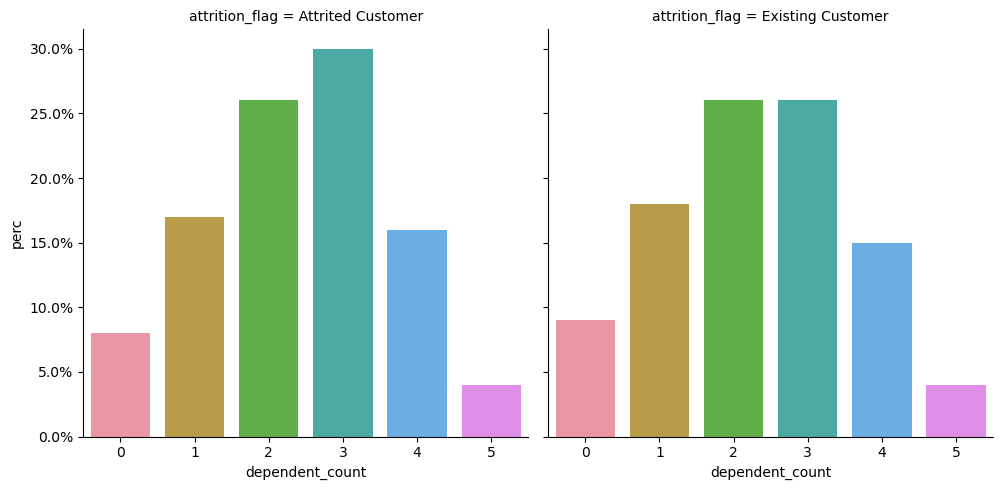

In [93]:
dependent_count = sns.catplot(x = 'dependent_count', y='perc', col = 'attrition_flag', kind = 'bar', data = df_dependent_count)
for ax in dependent_count.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

In [49]:
df_customer_age = (df.groupby(['attrition_flag'])['customer_age']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)
df_customer_age

,attrition_flag,customer_age,perc
0,Attrited Customer,43,0.05
1,Attrited Customer,48,0.05
2,Attrited Customer,44,0.05
3,Attrited Customer,46,0.05
4,Attrited Customer,45,0.05
...,...,...,...
82,Existing Customer,67,0.00
83,Existing Customer,66,0.00
84,Existing Customer,68,0.00
85,Existing Customer,70,0.00


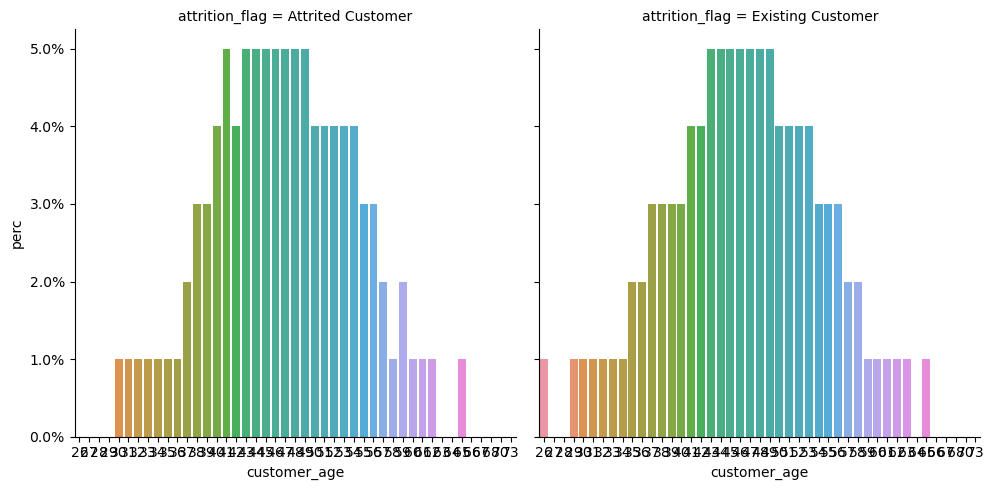

In [50]:
customer_age = sns.catplot(x = 'customer_age', y='perc', col = 'attrition_flag', kind = 'bar', data = df_customer_age)
for ax in customer_age.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

In [51]:
df_education_level = (df.groupby(['attrition_flag'])['education_level']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)
df_education_level

,attrition_flag,education_level,perc
0,Attrited Customer,Graduate,0.30
1,Attrited Customer,High School,0.19
2,Attrited Customer,Unknown,0.16
3,Attrited Customer,Uneducated,0.15
4,Attrited Customer,College,0.09
5,Attrited Customer,Doctorate,0.06
6,Attrited Customer,Post-Graduate,0.06
7,Existing Customer,Graduate,0.31
8,Existing Customer,High School,0.20
9,Existing Customer,Unknown,0.15


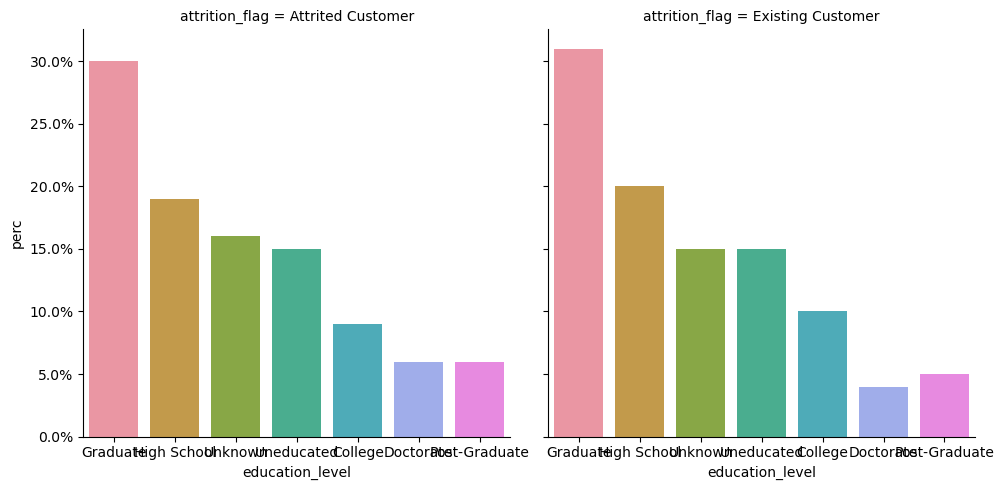

In [52]:
education_level = sns.catplot(x = 'education_level', y='perc', col = 'attrition_flag', kind = 'bar', data = df_education_level)
for ax in education_level.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

In [53]:
df_marital_status = (df.groupby(['attrition_flag'])['marital_status']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)
df_marital_status

,attrition_flag,marital_status,perc
0,Attrited Customer,Married,0.44
1,Attrited Customer,Single,0.41
2,Attrited Customer,Unknown,0.08
3,Attrited Customer,Divorced,0.07
4,Existing Customer,Married,0.47
5,Existing Customer,Single,0.39
6,Existing Customer,Divorced,0.07
7,Existing Customer,Unknown,0.07


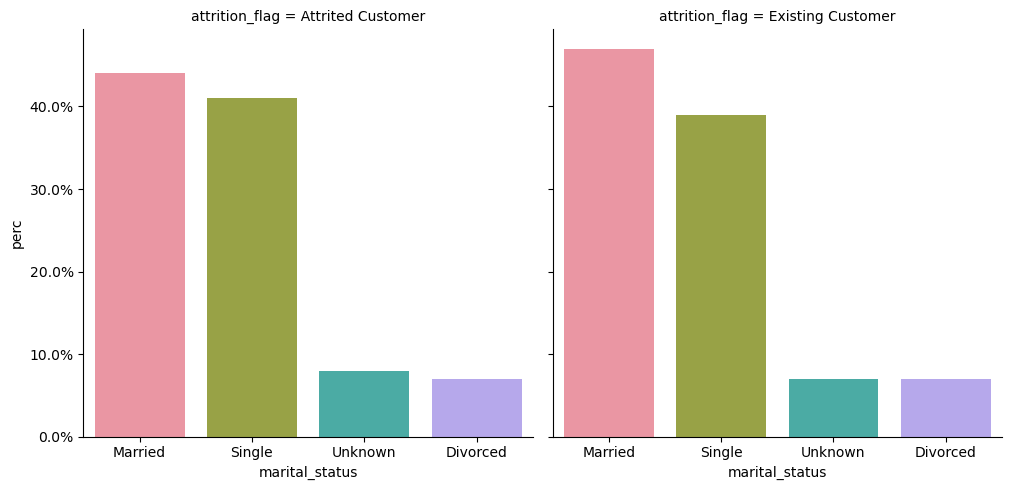

In [54]:
marital_status = sns.catplot(x = 'marital_status', y='perc', col = 'attrition_flag', kind = 'bar', data = df_marital_status)
for ax in marital_status.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

In [57]:
df_income_category = (df.groupby(['attrition_flag'])['income_category']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)
df_income_category

,attrition_flag,income_category,perc
0,Attrited Customer,Less than $40K,0.38
1,Attrited Customer,$40K - $60K,0.17
2,Attrited Customer,$80K - $120K,0.15
3,Attrited Customer,$60K - $80K,0.12
4,Attrited Customer,Unknown,0.11
5,Attrited Customer,$120K +,0.08
6,Existing Customer,Less than $40K,0.35
7,Existing Customer,$40K - $60K,0.18
8,Existing Customer,$80K - $120K,0.15
9,Existing Customer,$60K - $80K,0.14


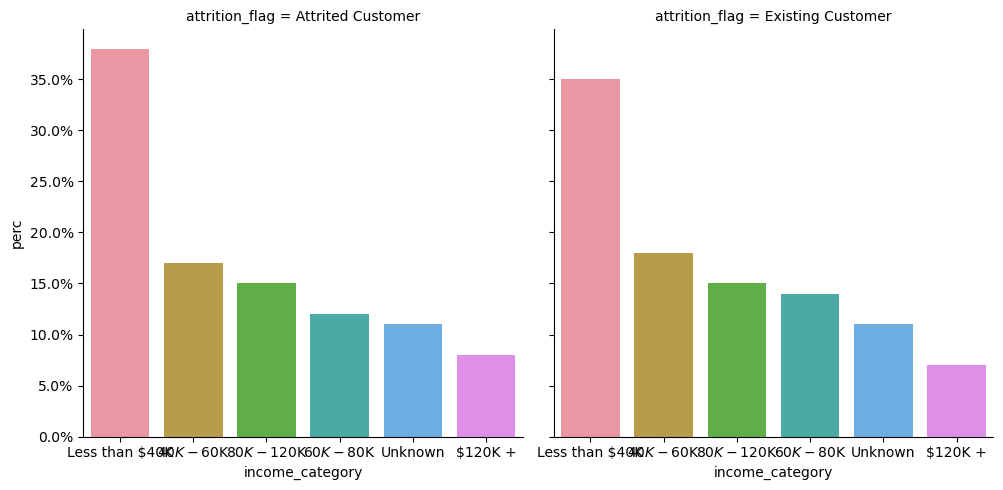

In [58]:
income_category = sns.catplot(x = 'income_category', y='perc', col = 'attrition_flag', kind = 'bar', data = df_income_category)
for ax in income_category.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

In [59]:
df_card_category = (df.groupby(['attrition_flag'])['card_category']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)
df_card_category

,attrition_flag,card_category,perc
0,Attrited Customer,Blue,0.93
1,Attrited Customer,Silver,0.05
2,Attrited Customer,Gold,0.01
3,Attrited Customer,Platinum,0.00
4,Existing Customer,Blue,0.93
5,Existing Customer,Silver,0.06
6,Existing Customer,Gold,0.01
7,Existing Customer,Platinum,0.00


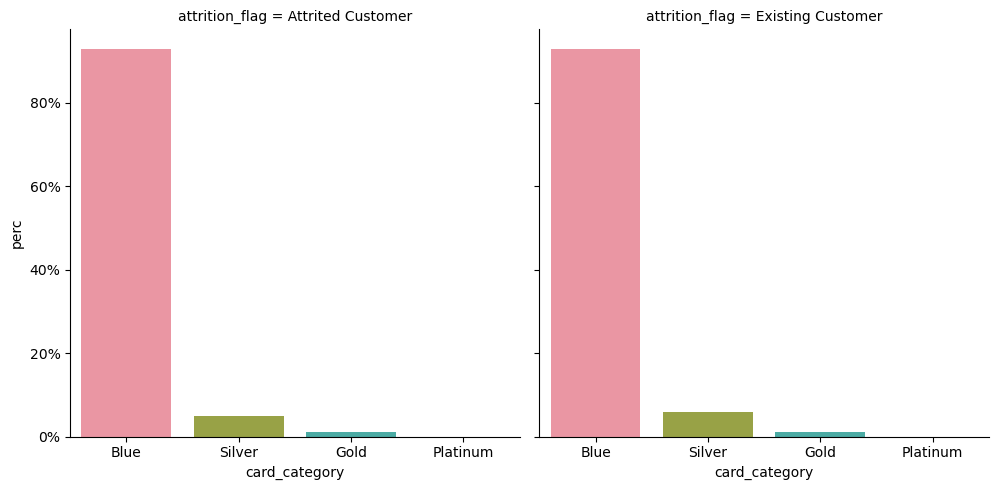

In [60]:
card_category = sns.catplot(x = 'card_category', y='perc', col = 'attrition_flag', kind = 'bar', data = df_card_category)
for ax in card_category.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

In [61]:
df_months_on_book = (df.groupby(['attrition_flag'])['months_on_book']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)
df_months_on_book

,attrition_flag,months_on_book,perc
0,Attrited Customer,36,0.26
1,Attrited Customer,39,0.04
2,Attrited Customer,37,0.04
3,Attrited Customer,30,0.04
4,Attrited Customer,34,0.04
...,...,...,...
83,Existing Customer,55,0.00
84,Existing Customer,17,0.00
85,Existing Customer,16,0.00
86,Existing Customer,15,0.00


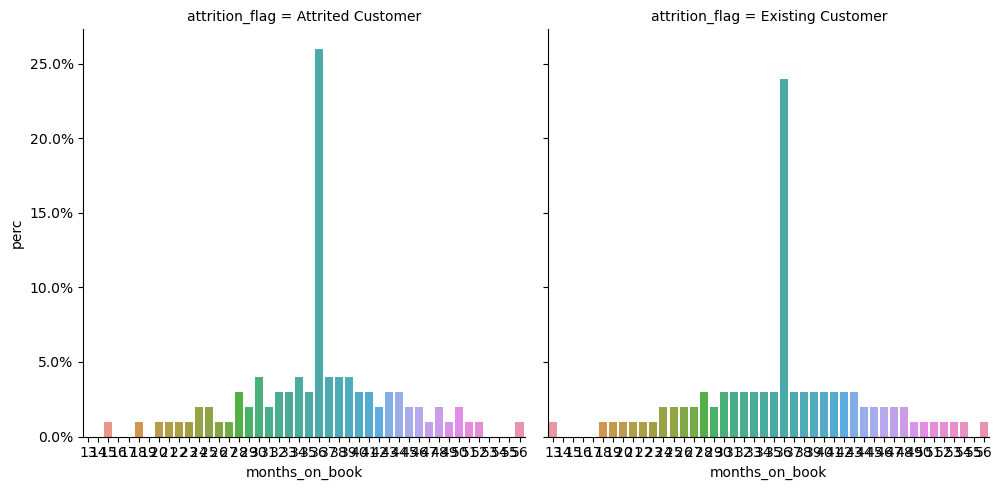

In [62]:
months_on_book = sns.catplot(x = 'months_on_book', y='perc', col = 'attrition_flag', kind = 'bar', data = df_months_on_book)
for ax in months_on_book.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

In [66]:
df_attrited_customer_2.months_on_book.unique ()

array([49, 56, 40, 36, 35, 45, 37, 41, 38, 53, 33, 52, 43, 46, 50, 30, 48,
       44, 34, 23, 42, 29, 24, 47, 39, 25, 28, 51, 22, 27, 18, 31, 20, 32,
       13, 15, 21, 26, 19, 16, 55, 54, 17, 14], dtype=int64)

In [67]:
df_months_on_book = (df_attrited_customer_2.groupby(['attrition_flag'])['months_on_book']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)
df_months_on_book

,attrition_flag,months_on_book,perc
0,Attrited Customer,36,0.26
1,Attrited Customer,39,0.04
2,Attrited Customer,37,0.04
3,Attrited Customer,30,0.04
4,Attrited Customer,34,0.04
5,Attrited Customer,38,0.04
6,Attrited Customer,41,0.03
7,Attrited Customer,33,0.03
8,Attrited Customer,35,0.03
9,Attrited Customer,40,0.03


### Интересуют клиенты, которые пользуются услугами 36 месяцев

In [43]:
df_attrited_customer_36month = df.query("months_on_book == 36")

In [44]:
df_attrited_customer_36month

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
12,710599683,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,...,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10115,712210458,Existing Customer,38,M,1,Uneducated,Single,$40K - $60K,Blue,36,...,3,2,5639.0,1558,4081.0,0.614,16628,109,0.946,0.276
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [46]:
df_attrited_customer_36month.describe ()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,2463.000000,2463.000000,2463.0,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000
mean,46.155907,2.404791,36.0,3.782379,2.346326,2.427933,8505.956232,1151.958587,7353.997645,0.755181,4498.042225,65.209907,0.712825,0.276601
std,7.606811,1.304467,0.0,1.563099,0.966032,1.105146,9115.600767,824.045454,9112.362914,0.222819,3452.387799,23.540643,0.245057,0.279178
min,26.000000,0.000000,36.0,1.000000,0.000000,0.000000,1438.300000,0.000000,10.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,36.0,3.000000,2.000000,2.000000,2516.000000,0.000000,1283.500000,0.627000,2171.500000,45.000000,0.579000,0.000000
50%,46.000000,2.000000,36.0,4.000000,2.000000,2.000000,4375.000000,1264.000000,3316.000000,0.733000,3978.000000,68.000000,0.698000,0.178000
75%,51.000000,3.000000,36.0,5.000000,3.000000,3.000000,10554.500000,1778.000000,9463.500000,0.853000,4784.500000,81.000000,0.820000,0.504500
max,73.000000,5.000000,36.0,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,134.000000,3.250000,0.995000


In [99]:
df_attrited_customer_36month_111 = (df_attrited_customer_36month.groupby(['education_level'])['income_category']
 .value_counts(normalize=True).round(2)
 .to_frame('perc').reset_index()
)
df_attrited_customer_36month_111

,education_level,income_category,perc
0,College,Less than $40K,0.41
1,College,$80K - $120K,0.15
2,College,$40K - $60K,0.14
3,College,Unknown,0.12
4,College,$60K - $80K,0.12
5,College,$120K +,0.06
6,Doctorate,Less than $40K,0.36
7,Doctorate,$60K - $80K,0.17
8,Doctorate,Unknown,0.16
9,Doctorate,$40K - $60K,0.12


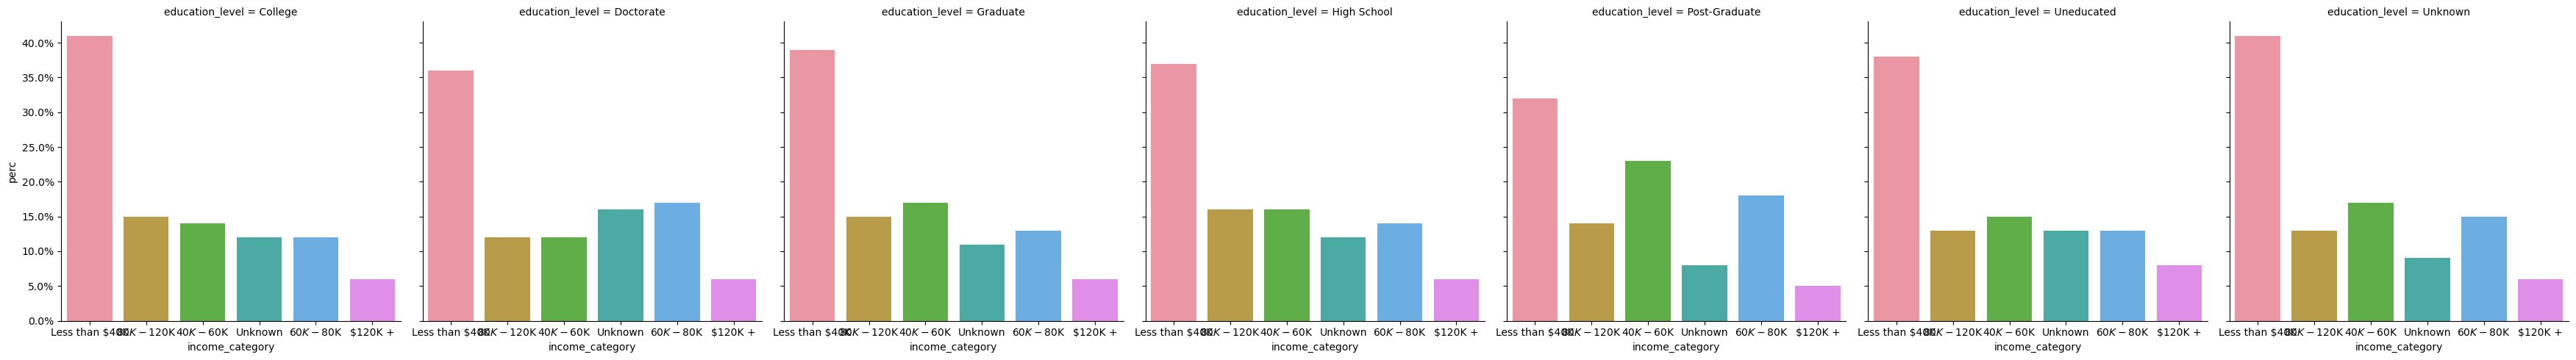

In [100]:
df_attrited_customer_36month_111 = sns.catplot(x = 'income_category', y='perc', col = 'education_level', kind = 'bar', data = df_attrited_customer_36month_111)
for ax in df_attrited_customer_36month_111.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))

In [101]:
df_attrited_customer_36month.head(2)

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


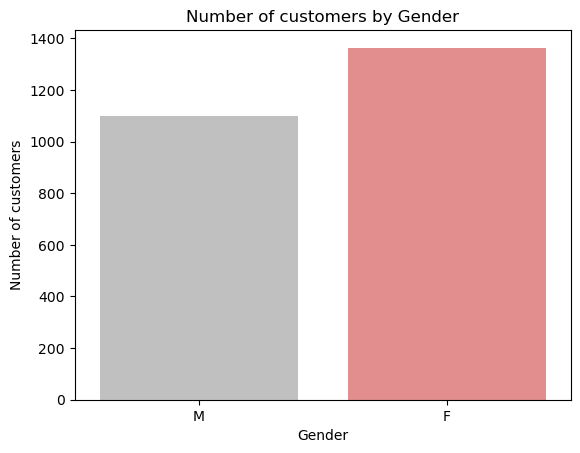

In [102]:
color = ['#C0C0C0', '#F08080']
sns.set_palette(sns.color_palette(color))
sns.countplot(x="gender", data=df_attrited_customer_36month)
plt.title("Number of customers by Gender")
plt.ylabel("Number of customers")
plt.xlabel("Gender")
plt.show()

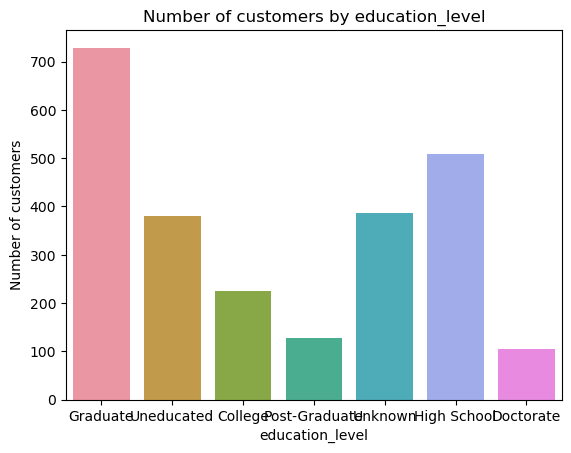

In [103]:
color = ['#C0C0C0', '#F08080']
sns.set_palette(sns.color_palette(color))
sns.countplot(x="education_level", data=df_attrited_customer_36month)
plt.title("Number of customers by education_level")
plt.ylabel("Number of customers")
plt.xlabel("education_level")
plt.show()

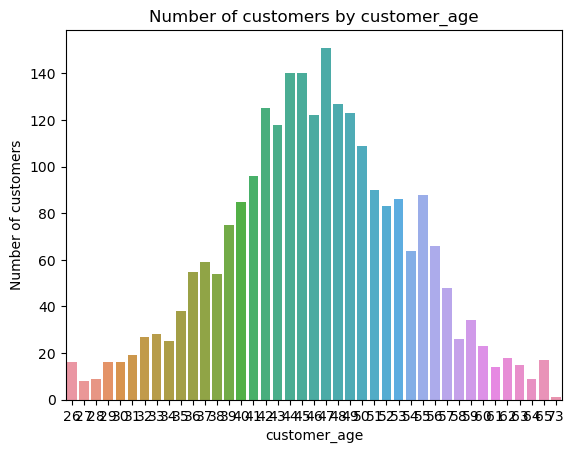

In [104]:
sns.set_palette(sns.color_palette(color))
sns.countplot(x="customer_age", data=df_attrited_customer_36month)
plt.title("Number of customers by customer_age")
plt.ylabel("Number of customers")
plt.xlabel("customer_age")
plt.show()

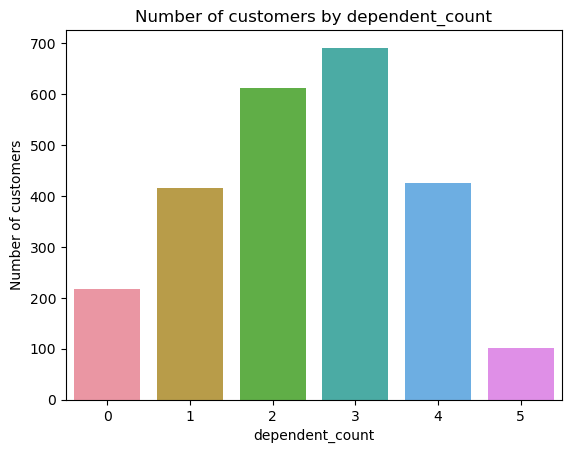

In [106]:
sns.set_palette(sns.color_palette(color))
sns.countplot(x="dependent_count", data=df_attrited_customer_36month)
plt.title("Number of customers by dependent_count")
plt.ylabel("Number of customers")
plt.xlabel("dependent_count")
plt.show()

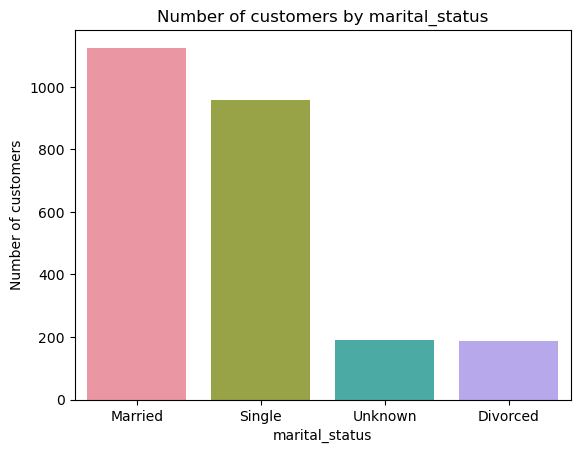

In [107]:
sns.set_palette(sns.color_palette(color))
sns.countplot(x="marital_status", data=df_attrited_customer_36month)
plt.title("Number of customers by marital_status")
plt.ylabel("Number of customers")
plt.xlabel("marital_status")
plt.show()

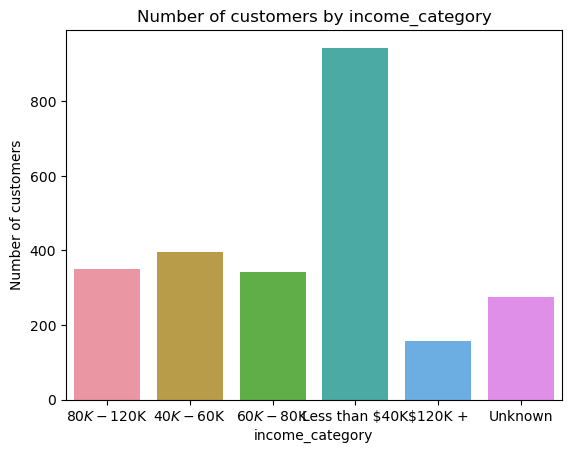

In [108]:
sns.set_palette(sns.color_palette(color))
sns.countplot(x="income_category", data=df_attrited_customer_36month)
plt.title("Number of customers by income_category")
plt.ylabel("Number of customers")
plt.xlabel("income_category")
plt.show()

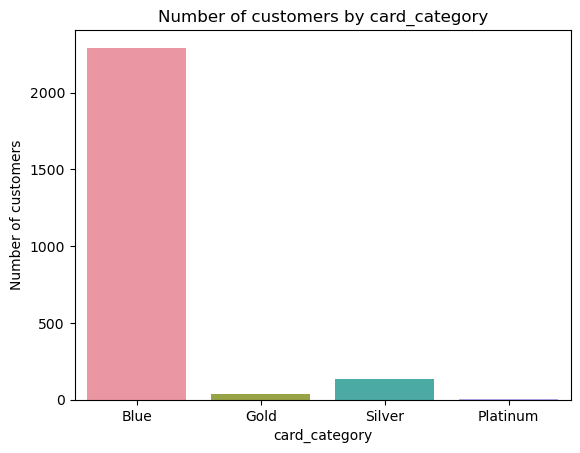

In [109]:
sns.set_palette(sns.color_palette(color))
sns.countplot(x="card_category", data=df_attrited_customer_36month)
plt.title("Number of customers by card_category")
plt.ylabel("Number of customers")
plt.xlabel("card_category")
plt.show()

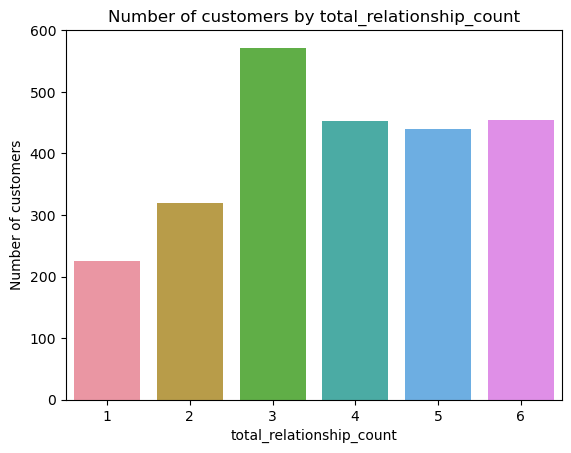

In [111]:
sns.countplot(x="total_relationship_count", data=df_attrited_customer_36month)
plt.title("Number of customers by total_relationship_count")
plt.ylabel("Number of customers")
plt.xlabel("total_relationship_count")
plt.show()

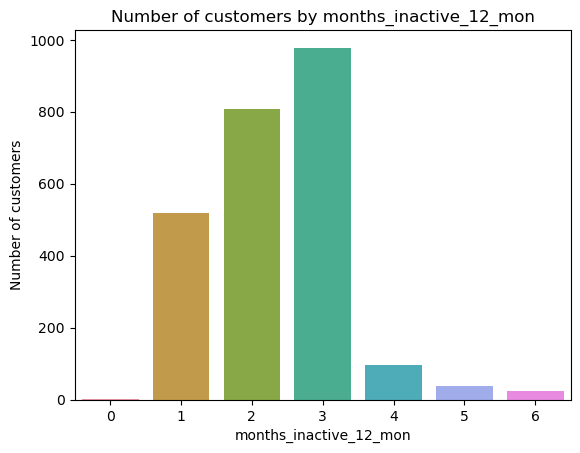

In [112]:
sns.countplot(x="months_inactive_12_mon", data=df_attrited_customer_36month)
plt.title("Number of customers by months_inactive_12_mon")
plt.ylabel("Number of customers")
plt.xlabel("months_inactive_12_mon")
plt.show()

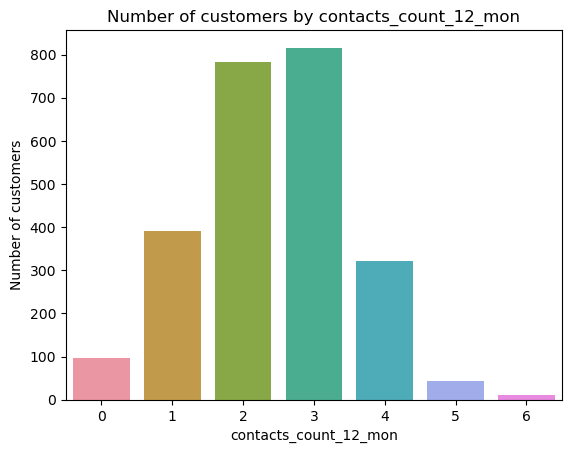

In [113]:
sns.countplot(x="contacts_count_12_mon", data=df_attrited_customer_36month)
plt.title("Number of customers by contacts_count_12_mon")
plt.ylabel("Number of customers")
plt.xlabel("contacts_count_12_mon")
plt.show()

# Общее количество транзакций за последние 12 месяцев

<Axes: xlabel='total_trans_amt', ylabel='total_trans_ct'>

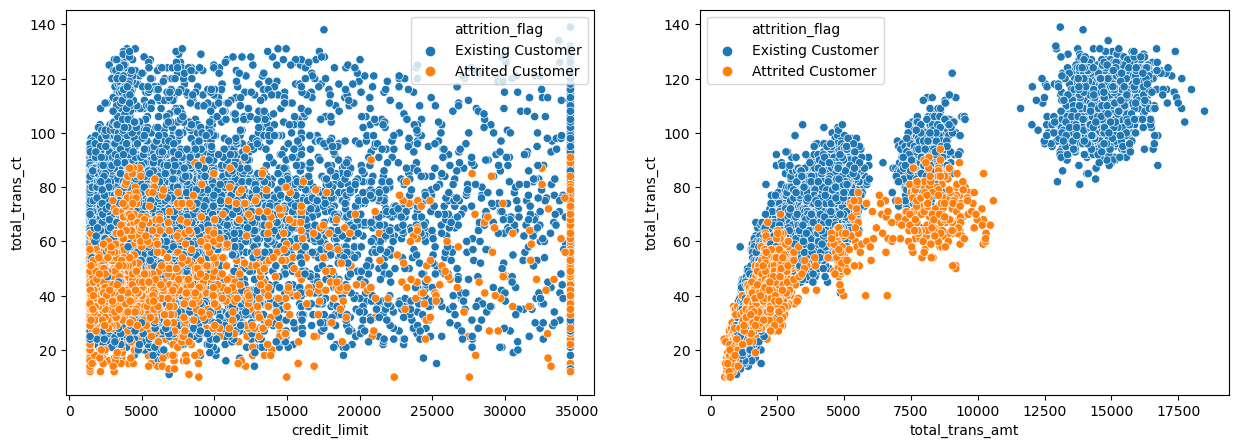

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
fig , ax = plt.subplots(ncols=2, figsize=(15,5))
sns.scatterplot(data=df, x='credit_limit', y='total_trans_ct', hue='attrition_flag', ax=ax[0])
sns.scatterplot(data=df, x='total_trans_amt' , y='total_trans_ct', hue='attrition_flag', ax=ax[1])

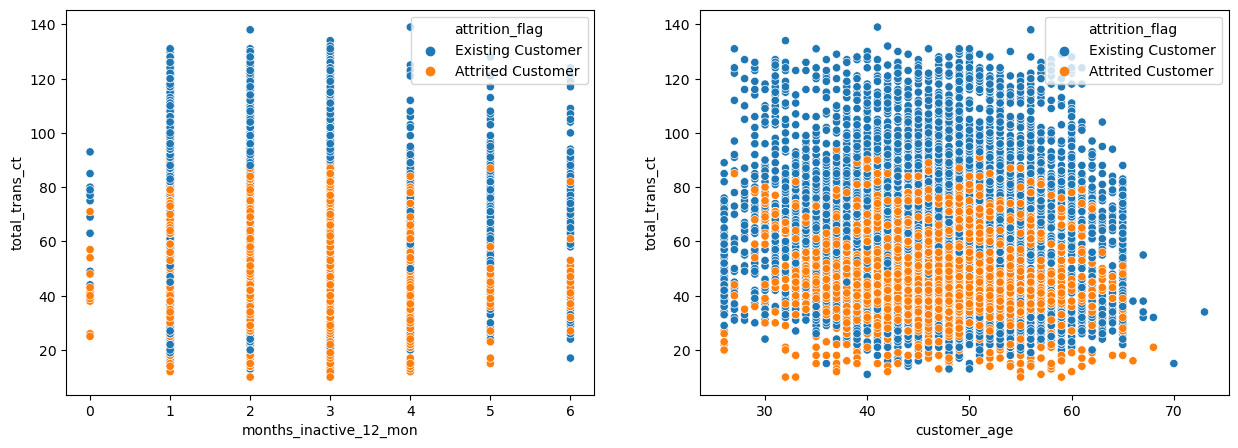

In [53]:
fig , ax = plt.subplots(ncols = 2, figsize= (15,5))
sns.scatterplot(data=df, x='months_inactive_12_mon' , y='total_trans_ct', hue = 'attrition_flag', ax = ax[0])
freqplot = sns.scatterplot(data = df, x = 'customer_age' , y = 'total_trans_ct', hue = 'attrition_flag', ax = ax[1])